In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from synthetic_data import topology_generators, weight_assigners
import matplotlib.pyplot as plt
import numpy as np

In [3]:
connectivity_graph, neuron_types = topology_generators.assembly_generator(
    n_nodes=50,
    n_assemblies=5,
    p_within=0.3,
    p_between=0.1,
)

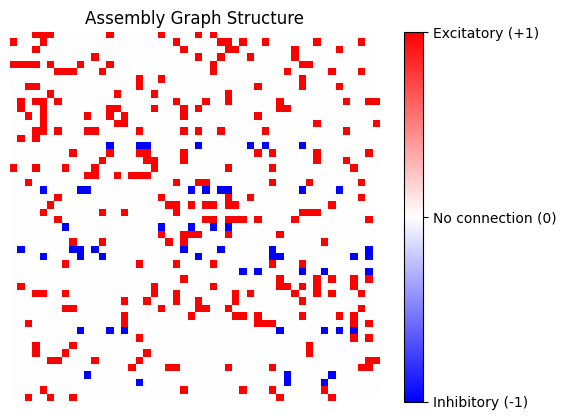

In [4]:
fig, ax = plt.subplots()
im = ax.imshow(connectivity_graph, cmap="bwr", vmin=-1, vmax=1)
cbar = plt.colorbar(im, ax=ax, ticks=[-1, 0, 1])
cbar.ax.set_yticklabels(["Inhibitory (-1)", "No connection (0)", "Excitatory (+1)"])
ax.set_title("Assembly Graph Structure")
ax.axis("off")
plt.show()

In [5]:
weights = weight_assigners.assign_weights_lognormal(
    connectivity_graph=connectivity_graph,
    neuron_types=neuron_types,
    E_mean=1.0,
    E_std=0.2,
    I_mean=2.0,
    I_std=0.2,
)

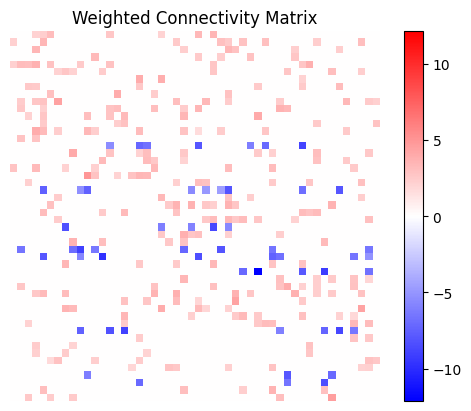

In [6]:
fig, ax = plt.subplots()
# Center colormap at 0 by using symmetric limits
vmax = np.abs(weights).max()
im = ax.imshow(weights, cmap="bwr", vmin=-vmax, vmax=vmax)
plt.colorbar(im, ax=ax)
ax.set_title("Weighted Connectivity Matrix")
ax.axis("off")
plt.show()